<a href="https://colab.research.google.com/github/filzahms/DataMiningS6/blob/main/FilzahMS_202055202049_UTSDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
mkdir -p /content/data

In [2]:
cp /content/DatasetCuaca.zip /content/data

In [3]:
!unzip /content/data/DatasetCuaca.zip

Archive:  /content/data/DatasetCuaca.zip
   creating: DatasetCuaca/
  inflating: DatasetCuaca/DatasetCuaca_convert.xlsx  


In [4]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 91.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b2b5321bb59af19cec48899e906b6a018582e95906536868df1a7760c4785d0a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [17]:
import pandas as pd
import pandas_profiling
import ydata_profiling
import numpy as np
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile 
from scipy import stats
import seaborn as sns

In [18]:
# 1
# Prepocessing Dataset
data_xlsx = pd.read_excel('/content/DatasetCuaca/DatasetCuaca_convert.xlsx')
data_xlsx.to_csv('DatasetCuaca_convert.csv', index=False)

In [19]:
# 2
# Mencari nilai Mean, Median dan Modus dari Suhu Udara
data = pd.read_csv('DatasetCuaca_convert.csv')

mean = data['Suhu Udara'].mean()
median = data['Suhu Udara'].median()
mode = data['Suhu Udara'].mode()

print("Nilai Mean: ", mean)
print("Nilai Median: ", median)
print("Nilai Modus: ", mode)

Nilai Mean:  27.16111111111111
Nilai Median:  27.2
Nilai Modus:  0    26.6
1    27.2
2    27.4
3    27.8
4    28.0
Name: Suhu Udara, dtype: float64


In [20]:
# 3
# Mencari nilai Mean, Median dan Modus dari Curah Hujan
data = pd.read_csv('DatasetCuaca_convert.csv')

mean = data['Curah Hujan'].mean()
median = data['Curah Hujan'].median()
mode = data['Curah Hujan'].mode()

print("Nilai Mean: ", mean)
print("Nilai Median: ", median)
print("Nilai Modus: ", mode)

Nilai Mean:  273.2527777777778
Nilai Median:  239.6
Nilai Modus:  0      25.9
1      35.6
2      38.7
3      76.7
4      81.7
5      97.1
6     118.1
7     121.0
8     134.7
9     141.0
10    147.0
11    165.8
12    175.0
13    180.0
14    193.7
15    223.5
16    233.0
17    236.0
18    243.2
19    283.1
20    287.0
21    298.0
22    302.0
23    330.0
24    333.9
25    360.0
26    362.0
27    377.0
28    391.5
29    394.4
30    478.0
31    511.0
32    516.7
33    519.0
34    678.2
35    747.6
Name: Curah Hujan, dtype: float64


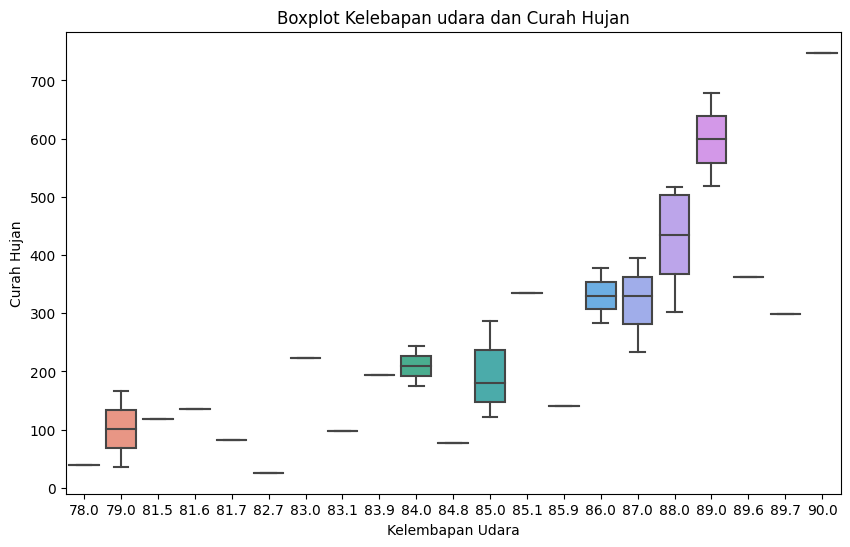

In [21]:
# 4 (EDA)
#  Boxplot Data Kelembaban Udara dan Curah Hujan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kelembapan Udara', y='Curah Hujan', data=data)
plt.title('Boxplot Kelebapan udara dan Curah Hujan')
plt.xlabel('Kelembapan Udara')
plt.ylabel('Curah Hujan')
plt.show()

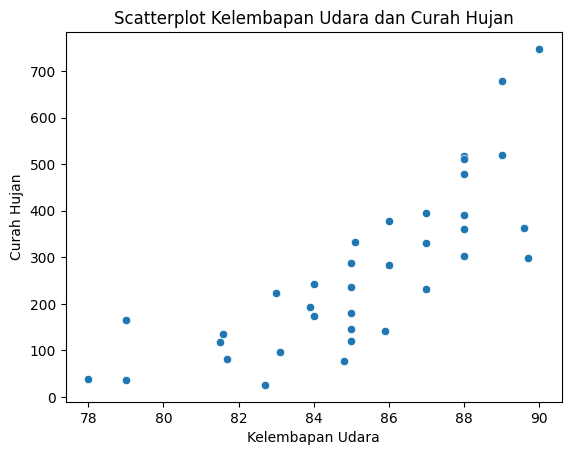

In [22]:
# 4 (EDA)
#  Scatterplot Data Kelembaban Udara dan Curah Hujan
sns.scatterplot(x='Kelembapan Udara', y='Curah Hujan', data=data)
plt.title('Scatterplot Kelembapan Udara dan Curah Hujan')
plt.xlabel('Kelembapan Udara')
plt.ylabel('Curah Hujan')
plt.show()

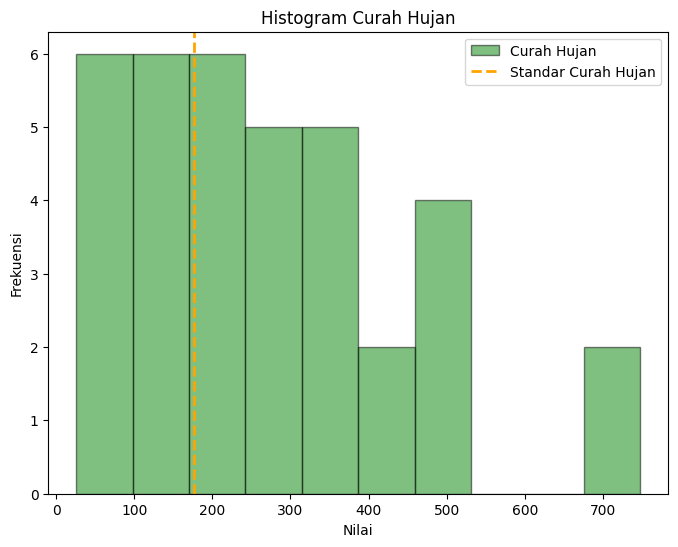

In [23]:
# 5
# Histogram Standar Deviasi pada data Curah Hujan
std_Curah_Hujan = data['Curah Hujan'].std()

plt.figure(figsize=(8, 6))
plt.hist(data['Curah Hujan'], bins=10, alpha=0.5, color='green', edgecolor='black', label='Curah Hujan')

plt.axvline(x=std_Curah_Hujan, color='orange', linestyle='--', linewidth=2, label='Standar Curah Hujan')

plt.title('Histogram Curah Hujan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

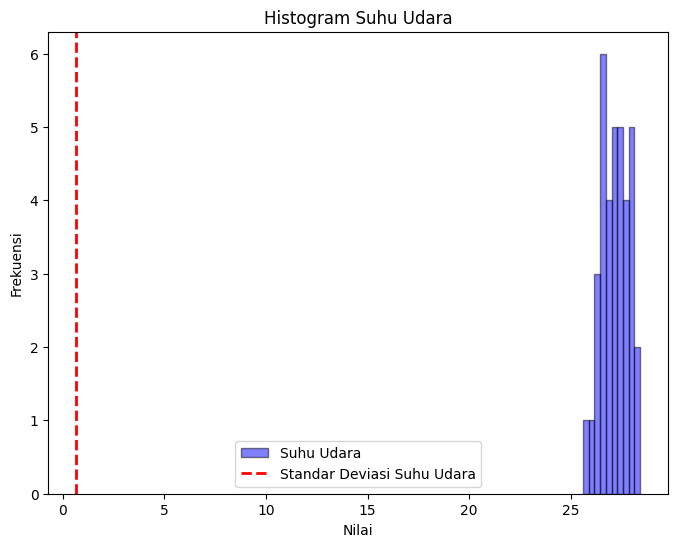

In [24]:
# 5
# Histogram Standar Deviasi pada data Suhu Udara
std_Suhu_Udara = data['Suhu Udara'].std()

plt.figure(figsize=(8, 6))
plt.hist(data['Suhu Udara'], bins=10, alpha=0.5, color='blue', edgecolor='black', label='Suhu Udara')

plt.axvline(x=std_Suhu_Udara, color='red', linestyle='--', linewidth=2, label='Standar Deviasi Suhu Udara')

plt.title('Histogram Suhu Udara')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [25]:
# 6
# Report Non Graphical EDA
data = pd.read_csv('DatasetCuaca_convert.csv')

report = data.describe()
print(report)

       Suhu Udara  Tekanan Udara  Kelembapan Udara  Kecepatan Angin  \
count   36.000000      36.000000         36.000000        36.000000   
mean    27.161111    1009.052778         85.294444         4.350000   
std      0.678350       0.959907          3.106670         0.618061   
min     25.600000    1007.200000         78.000000         3.700000   
25%     26.675000    1008.475000         83.700000         4.000000   
50%     27.200000    1009.000000         85.050000         4.150000   
75%     27.800000    1009.525000         88.000000         4.525000   
max     28.400000    1011.400000         90.000000         6.500000   

       Curah Hujan  
count    36.000000  
mean    273.252778  
std     176.640231  
min      25.900000  
25%     139.425000  
50%     239.600000  
75%     365.750000  
max     747.600000  


In [26]:
report = pandas_profiling.ProfileReport(data)

In [27]:
report.to_file('laporan_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
report.to_notebook_iframe()